In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload() 
df=pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Cleaning and Visualization

> Indented block



In [0]:
df.shape

(23486, 11)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [0]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Classification of products into 'GOOD' or 'BAD' on the basis of RATING

In [0]:
df['Rating'].unique()

array([4, 5, 3, 2, 1])

In [0]:
df['Classification']='Good'
df.loc[df.Rating<=3,['Classification']]='Bad'
df = df[['Clothing ID','Age','Title','Review Text','Rating','Classification','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']]

In [0]:
df

,Clothing ID,Age,Title,Review Text,Rating,Classification,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Good,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Good,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Bad,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Good,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Good,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,Good,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,Bad,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,Bad,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,Bad,1,2,General,Dresses,Dresses


In [0]:
df['Classification'].value_counts()

Good    18208
Bad      5278
Name: Classification, dtype: int64

### Percentages of Good and Bad Classes

In [0]:
(df['Classification'].value_counts())/(len(df['Classification']))*100

Good    77.527037
Bad     22.472963
Name: Classification, dtype: float64

In [0]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

*Age* vs Count analysis plot

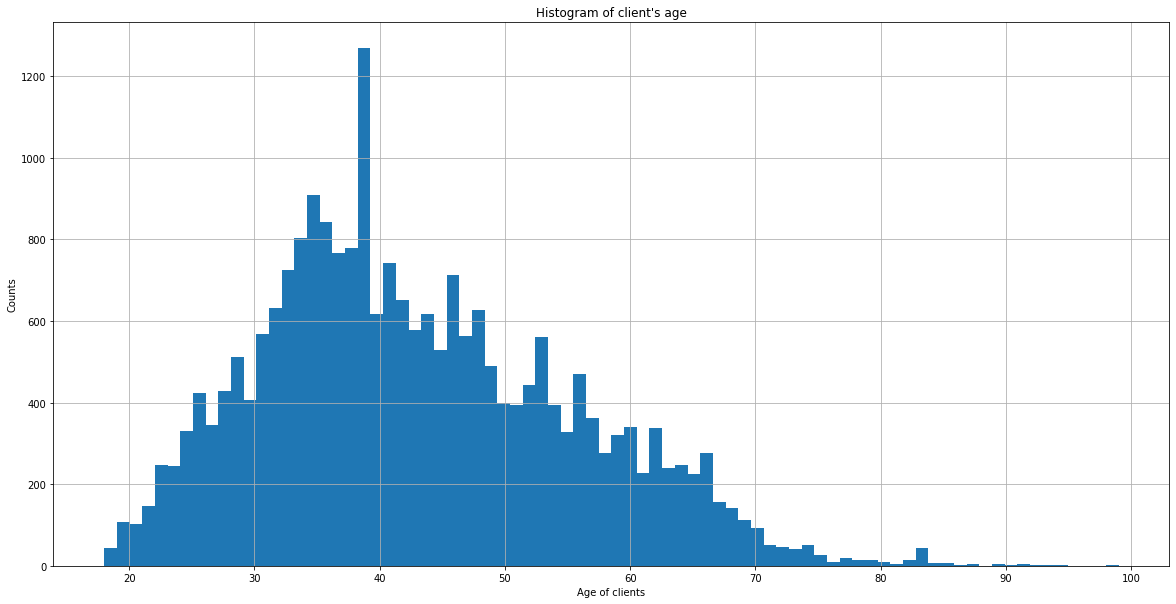

In [0]:
df["Age"].hist(bins = 80, figsize=(20,10), rwidth=1.0)
plt.xlabel("Age of clients")
plt.ylabel("Counts")
plt.title("Histogram of client's age")
plt.rcParams['axes.axisbelow'] = True

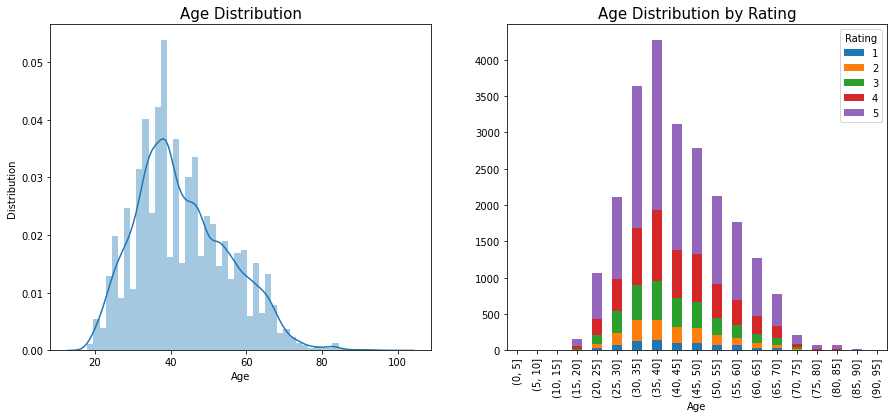

In [0]:
f, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
sns.distplot(df['Age'], ax = ax[0])
ax[0].set_title('Age Distribution', fontsize=15)
ax[0].set_ylabel('Distribution')
df.groupby(['Rating',pd.cut(df['Age'], np.arange(0,100,5))]).size().unstack(0).plot.bar(stacked=True, ax=ax[1])
ax[1].set_title('Age Distribution by Rating', fontsize=15)
plt.show()

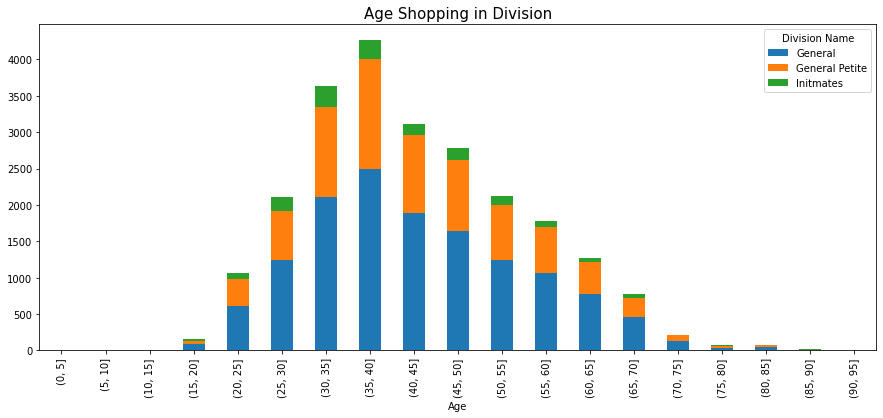

In [0]:
f, ax = plt.subplots(nrows=1, figsize=(15,6))
df.groupby(['Division Name',pd.cut(df['Age'], np.arange(0,100,5))]).size().unstack(0).plot.bar(stacked=True, ax=ax)
ax.set_title('Age Shopping in Division',fontsize=15)
plt.show()

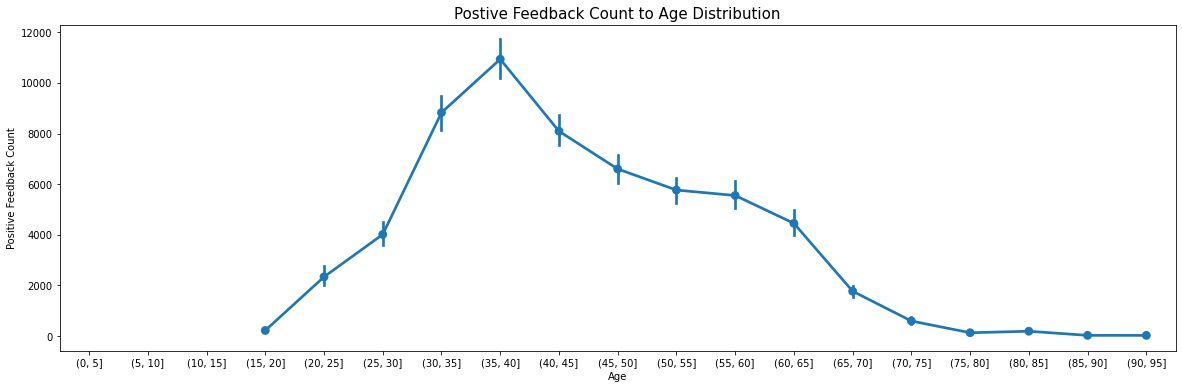

In [0]:
f, ax = plt.subplots(nrows = 1, figsize=(20,6))
sns.pointplot(x = pd.cut(df['Age'], np.arange(0,100,5)), y = df['Positive Feedback Count'], estimator = np.sum, ax=ax)
ax.set_title('Postive Feedback Count to Age Distribution', fontsize=15)
plt.show()

###### From the above analysis, we see the core age group that shop here is age 30-45 years. 
###### This age group are matured indivudals who cared about rating the product and mostly gave the rating of 5 and also found postive feedback helpful. 
###### Age group of above 70 didn't care much about the online rating, which is mostly because they are old.
###### The age group of 15-20 which are teenagers cared less about rating the products and also the feedback didn't back their shopping choices. 

Text(0.5, 1.0, 'Frequency Distribution of Classification')

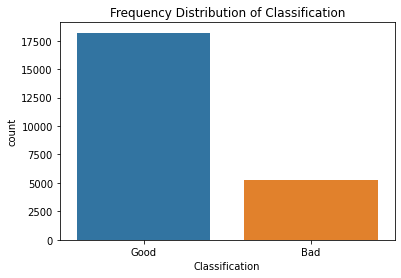

In [0]:
sns.countplot(x = 'Classification', data = df)
plt.title('Frequency Distribution of Classification')

Text(0.5, 1.0, 'Frequency Distribution of Ratings')

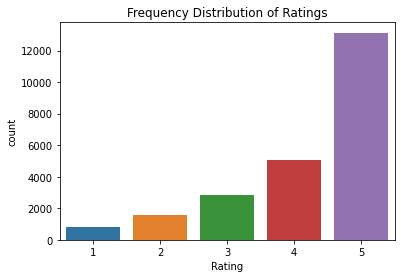

In [0]:
sns.countplot(x = 'Rating', data = df)
plt.title('Frequency Distribution of Ratings')

Text(0.5, 1.0, 'Rating Distribution per Age')

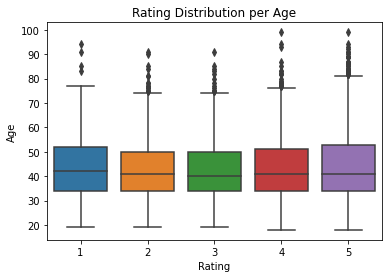

In [0]:
sns.boxplot(x = 'Rating', y = 'Age', data = df)
plt.title('Rating Distribution per Age')

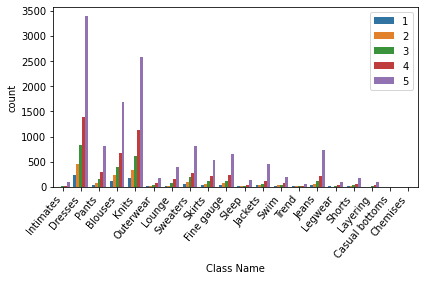

In [0]:
ax=sns.countplot(x="Class Name",hue='Rating',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(10,10)})

In [0]:
recommended = df[df['Recommended IND'] == 1]
not_recommended = df[df['Recommended IND'] == 0]

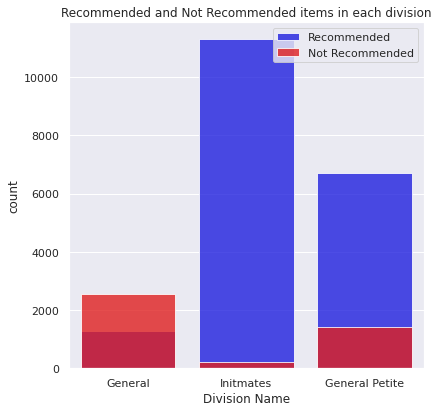

In [0]:
fig = plt.figure(figsize=(14,14))
ax = plt.subplot2grid((2,2),(0,0))
ax = sns.countplot(recommended['Division Name'], color = 'blue', alpha = 0.8, label = 'Recommended')
ax = sns.countplot(not_recommended['Division Name'], color = 'red', alpha = 0.8, label = 'Not Recommended')
ax = plt.title('Recommended and Not Recommended items in each division')
ax = plt.legend()

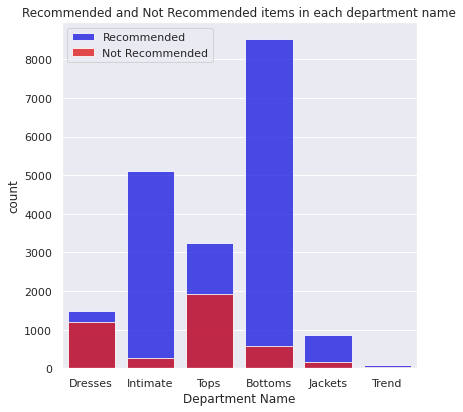

In [0]:
fig = plt.figure(figsize=(14,14))
ax = plt.subplot2grid((2,2),(0,0))
ax = sns.countplot(recommended['Department Name'], color = 'blue', alpha = 0.8, label = 'Recommended')
ax = sns.countplot(not_recommended['Department Name'], color = 'red', alpha = 0.8, label = 'Not Recommended')
ax = plt.title('Recommended and Not Recommended items in each department name')
ax = plt.legend()

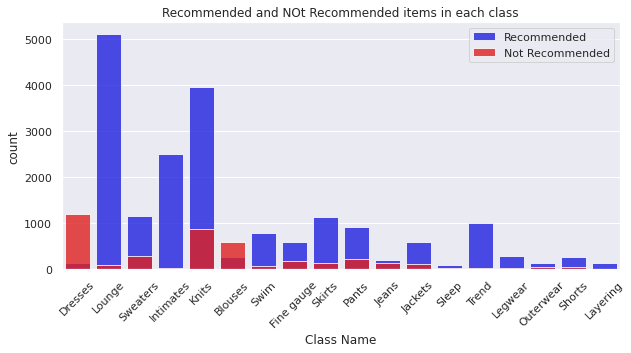

In [0]:
ax = plt.subplot2grid((2,2),(1,0), colspan = 2)
ax = plt.xticks(rotation=45)
ax = sns.countplot(recommended['Class Name'], color = 'blue', alpha = 0.8, label = 'Recommended')
ax = sns.countplot(not_recommended['Class Name'], color = 'red', alpha = 0.8, label = 'Not Recommended')
ax = plt.title('Recommended and NOt Recommended items in each class')
ax = plt.legend()

#### Here we can see that Dresses department and Blouses department need urgent care because no one is recommending this product.

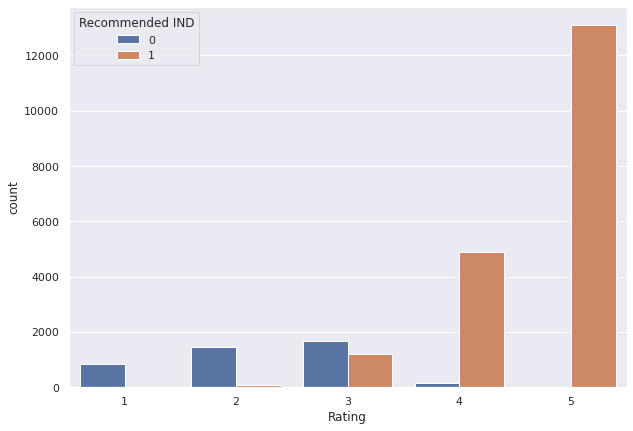

In [0]:
f,ax=plt.subplots(ncols=1,figsize=(10,7))
sns.countplot(x=df.Rating,hue=df['Recommended IND'],ax=ax)
plt.show()

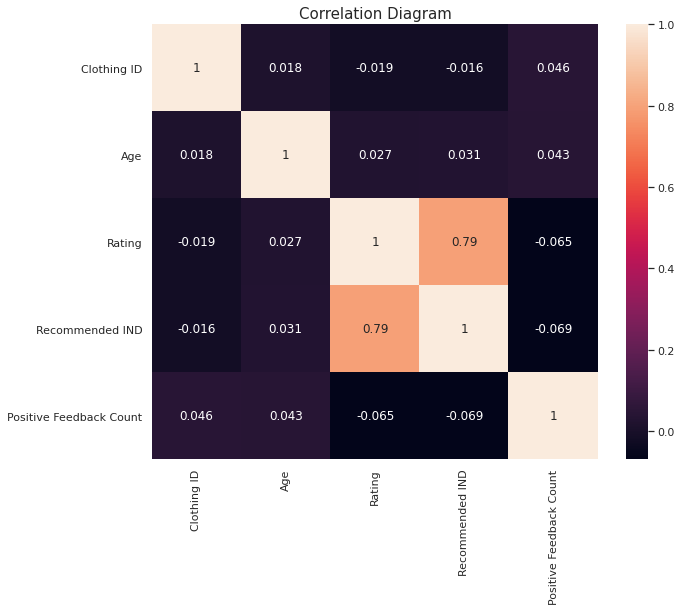

In [0]:
f, ax = plt.subplots(ncols = 1, figsize = (10,8))
sns.heatmap(df.corr(), annot = True, ax = ax)
ax.set_title('Correlation Diagram', fontsize = 15)
plt.show()


#### from the above heatmap, we can see that Rating is highly corelated to Recommanded IND

In [0]:
#to see which product has been reviewed most
df.groupby(['Clothing ID'])['Clothing ID'].agg(counts='count').reset_index().sort_values(by='counts',ascending=False)[:10]

,Clothing ID,counts
1078,1078,1024
862,862,806
1094,1094,756
1081,1081,582
872,872,545
829,829,527
1110,1110,480
868,868,430
895,895,404
936,936,358


In [0]:
#number of good and bad reviews based on age group
age_group=pd.DataFrame(columns=['Age Group','Total Reviews','Good','Bad'])
lst=[]
for i in [[0,20],[21,30],[31,40],[41,50],[51,60],[61,70],[71,80],[81,90],[91,100]]:
    lst.append([str(i[0])+'-'+str(i[1]),df[(df.Age>=i[0]) & (df.Age<i[1])]['Classification'].count(), df[(df.Age>=i[0]) & (df.Age<i[1])].groupby('Classification')['Classification'].count()['Good'],df[(df.Age>=i[0]) & (df.Age<i[1])].groupby('Classification')['Classification'].count()['Bad']])
age_group=age_group.append(pd.DataFrame(lst,columns=['Age Group','Total Reviews','Good','Bad']),ignore_index=True)
age_group

,Age Group,Total Reviews,Good,Bad
0,0-20,44,37,7
1,21-30,2779,2136,643
2,31-40,7295,5585,1710
3,41-50,5510,4230,1280
4,51-60,3550,2822,728
5,61-70,1964,1589,375
6,71-80,271,209,62
7,81-90,84,74,10
8,91-100,13,9,4


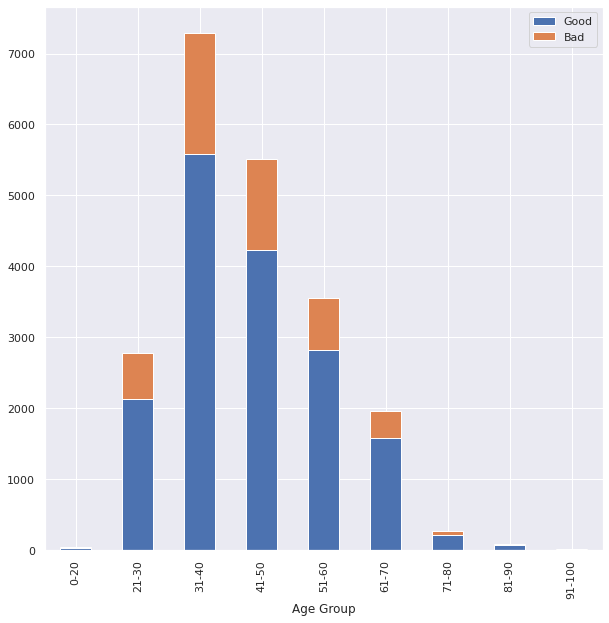

In [0]:
#plot of the number of good and bad reviews based on age group
sns.set()
age_group[['Age Group','Good','Bad']].set_index('Age Group').plot(kind='bar',stacked=True)

In [0]:
#relation between Recommended IND and review
temp=pd.DataFrame(columns=['Class','Count 1','Count 2'])
temp2=[]
for i in list([[1,0,'Good'],[1,0,'Bad']]):
    temp2.append([i[2],df[(df.Classification==i[2]) & (df['Recommended IND']==int(i[0]))]['Classification'].count(),df[(df.Classification==i[2]) & (df['Recommended IND']==int(i[1]))]['Classification'].count()])
temp = temp.append(pd.DataFrame(temp2,columns=['Classification','Count 1','Count 2']),ignore_index=True)

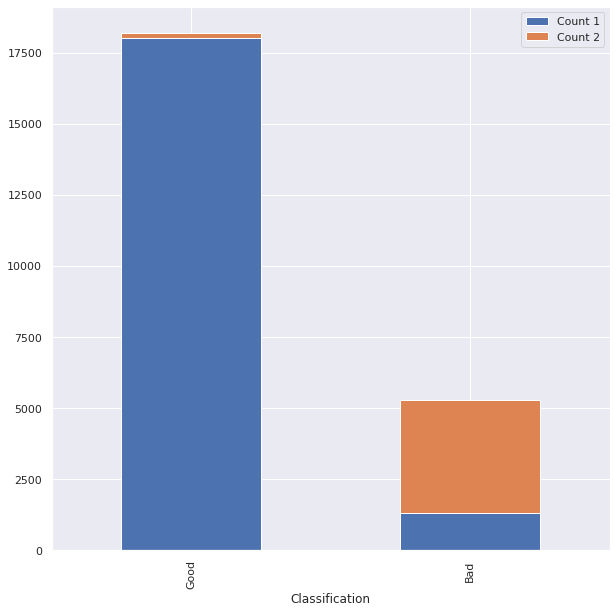

In [0]:
#plot showing the consistence and contrast between Recommended IND and review
sns.set()
temp[['Classification','Count 1','Count 2']].set_index('Classification').plot(kind='bar',stacked=True)

Class Recommendation Plot

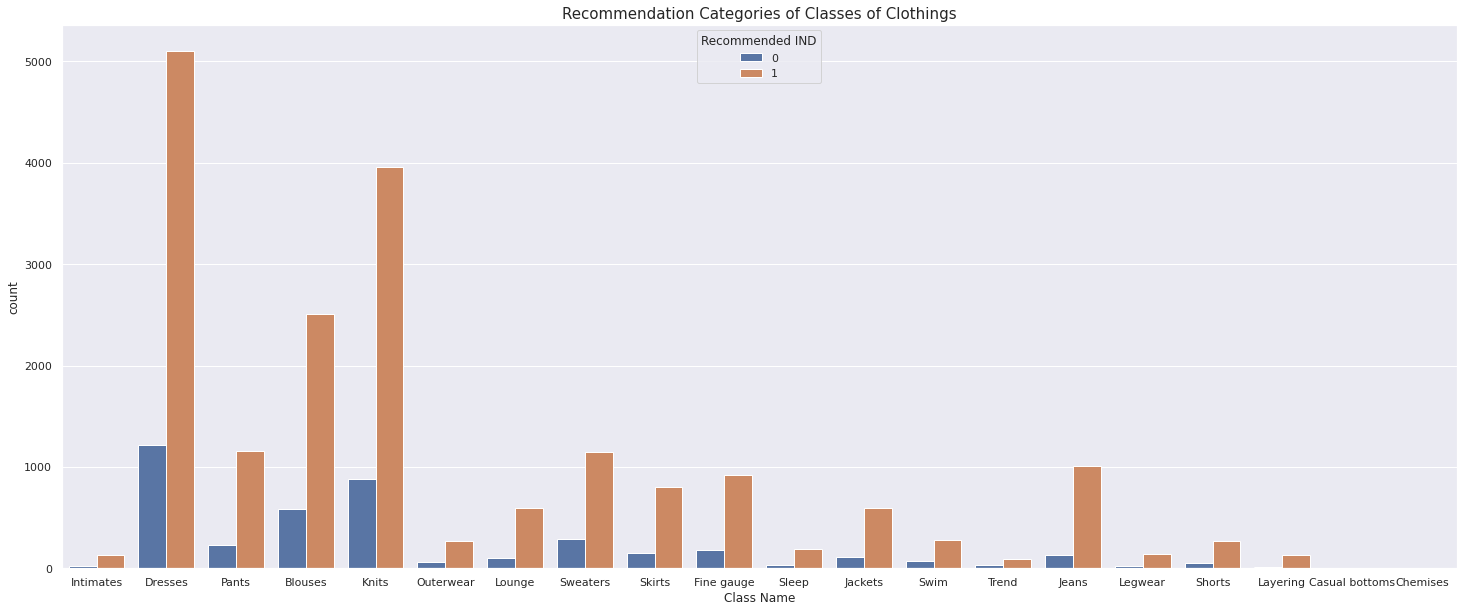

In [0]:
f,ax=plt.subplots(ncols=1,figsize=(25,10))
sns.countplot(x=df['Class Name'],hue=df['Recommended IND'],orient='H',ax=ax)
ax.set_title('Recommendation Categories of Classes of Clothings',fontsize=15)
plt.show()

From this we infer that Recommendation is directly in correlation to the count.

## Data Processing

In [0]:
df['Review Text'] = df['Review Text'].fillna('')

In [0]:
import re
import nltk
from wordcloud import WordCloud
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def cleanAndTokenize(review):
  text  = review.lower()
  tokenizer = nltk.tokenize.TreebankWordTokenizer()
  tokens = tokenizer.tokenize(text)
  stemmer = nltk.stem.WordNetLemmatizer()
  text = " ".join(stemmer.lemmatize(token) for token in tokens)
  text = re.sub("[^a-z']"," ", text)
  return text

df['Clean Review'] = df['Review Text'].apply(cleanAndTokenize)

In [0]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Classification,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean Review
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Good,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comf...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Good,1,4,General,Dresses,Dresses,love this dress it 's sooo pretty i happene...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Bad,0,0,General,Dresses,Dresses,i had such high hope for this dress and really...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Good,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit it 's fun ...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Good,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...


In [0]:
pos_reviews = df[df['Classification'] == 'Good']
neg_reviews = df[df['Classification'] == 'Bad']

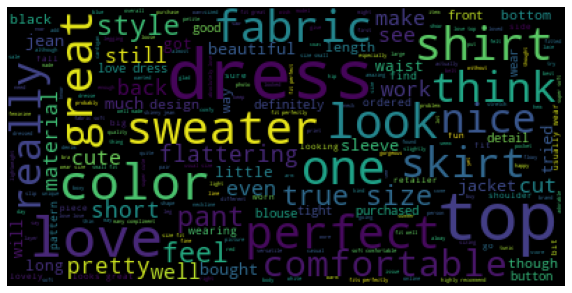

In [0]:
def word_cloud(df, bgcolor, title):
  plt.figure(figsize = (10,10))
  word_cloud = WordCloud(background_color = bgcolor, max_words = 1000, max_font_size = 50)
  word_cloud.generate(' '.join(df))
  plt.imshow(word_cloud)
  plt.axis('off')

word_cloud(pos_reviews['Review Text'], 'black', 'Most Used Words')

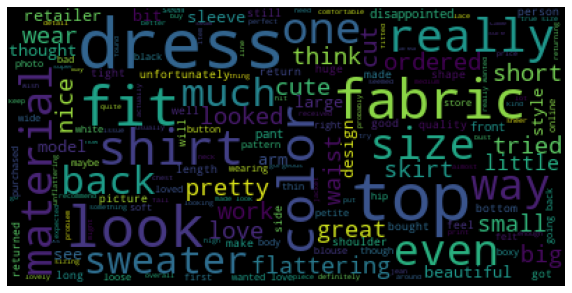

In [0]:
word_cloud(neg_reviews['Review Text'], 'black', 'Most Used Words')

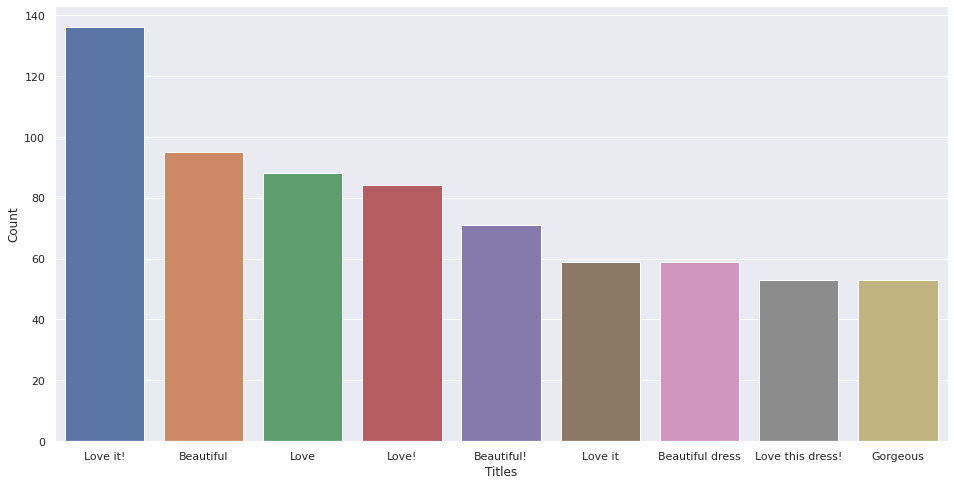

In [0]:
#the commonly used titles for positive review
a=nltk.FreqDist((pos_reviews['Title']))
d=pd.DataFrame({'Titles':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,8))
ax=sns.barplot(data=d,x='Titles',y='Count')
ax.set(ylabel='Count')
plt.show()

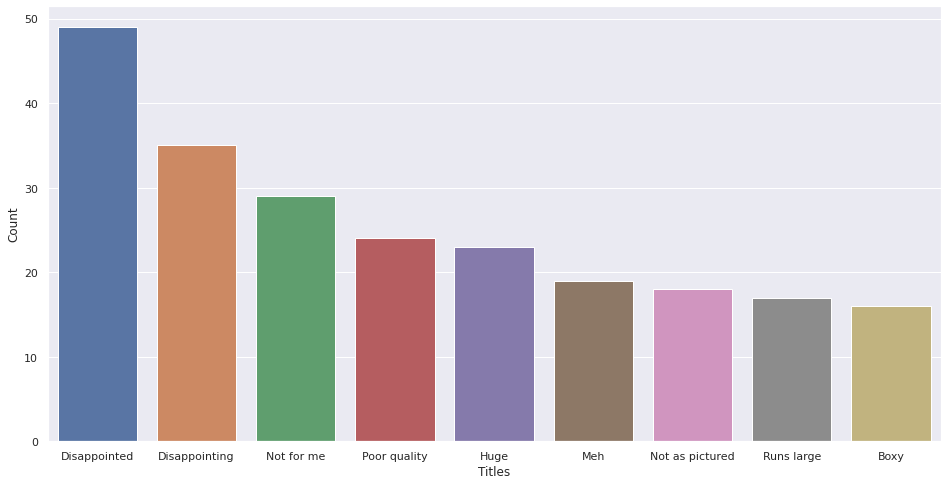

In [0]:
#the commonly used titles for negative review
a=nltk.FreqDist((neg_reviews['Title']))
d=pd.DataFrame({'Titles':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,8))
ax=sns.barplot(data=d,x='Titles',y='Count')
ax.set(ylabel='Count')
plt.show()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

In [0]:
def wordcounts(s):
    c = {}
    if analyzer(s):
        d = {}
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k
        for index,i in enumerate(w[0]):
            c[d[index]] = i
    return c

df['Word Counts'] = df['Review Text'].apply(wordcounts)

In [0]:
selectedwords=['awesome','great','fantastic','extraordinary','amazing',
               'super','magnificent','stunning','impressive','wonderful',
               'breathtaking','love','content','pleased','happy','glad',
               'satisfied','lucky','shocking','cheerful','wow','sad',
               'unhappy','horrible','regret','bad','terrible','annoyed',
               'disappointed','upset','awful','hate']


def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = df.copy()
for word in selectedwords:
    dfwc[word] = dfwc['Word Counts'].apply(selectedcount,args=(word,))

In [0]:
word_sum = dfwc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:10])

print('\nClass Names')
print(df['Class Name'].fillna("Empty").value_counts().iloc[:10])

Selected Words
love            8951
great           6117
super           1726
happy            705
glad             614
disappointed     585
amazing          503
bad              392
wonderful        300
stunning         289
dtype: int64

Class Names
Dresses       6319
Knits         4843
Blouses       3097
Sweaters      1428
Pants         1388
Jeans         1147
Fine gauge    1100
Skirts         945
Jackets        704
Lounge         691
Name: Class Name, dtype: int64


##### Looking at the above analysis above, we can say that the Selected Words have 8 positive words and 2 negative words out of 10.

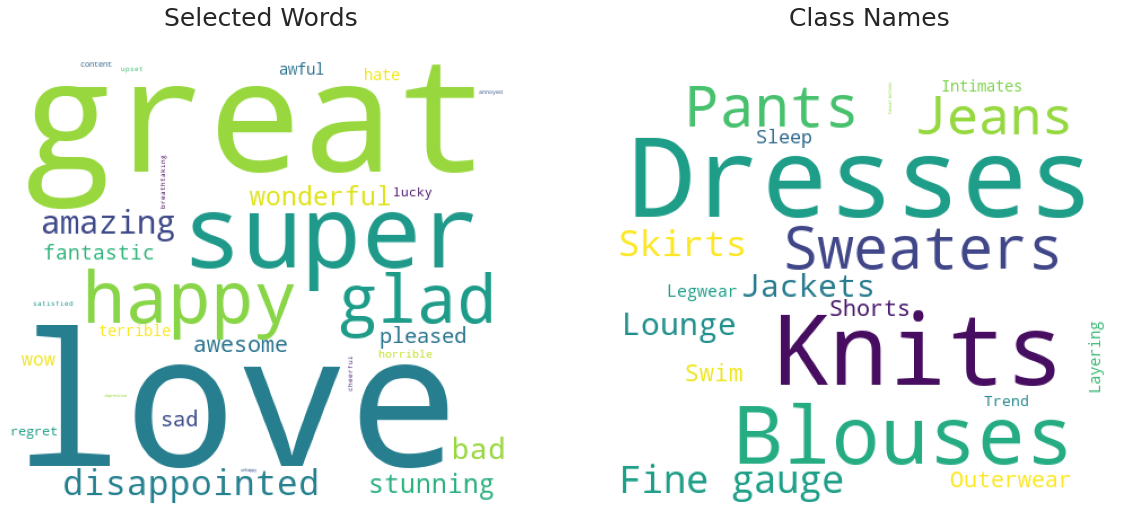

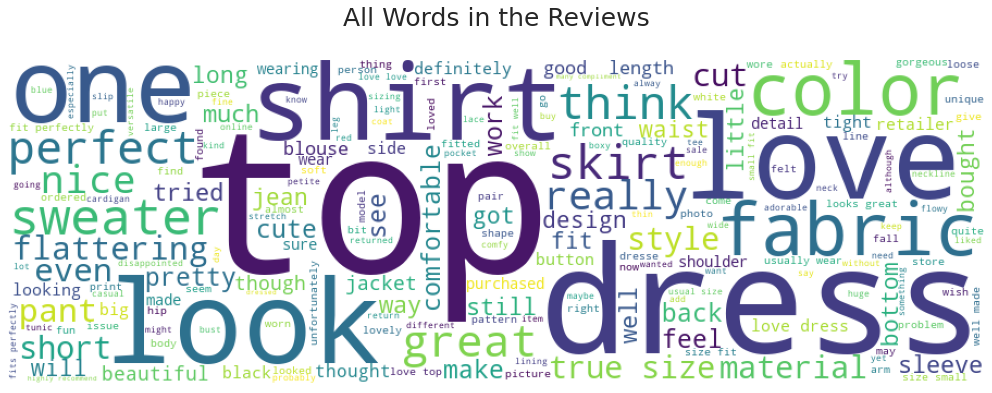

In [0]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
wc0 = WordCloud(background_color='white', width=450, height=400 ).generate_from_frequencies(word_sum)

cn = df['Class Name'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white', width=450, height=400).generate_from_frequencies(cn)

ax[0].imshow(wc0)
ax[0].set_title('Selected Words\n',size=25)
ax[0].axis('off')

ax[1].imshow(wc1)
ax[1].set_title('Class Names\n',size=25)
ax[1].axis('off')

rt = df['Review Text']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white', width=900, height=300).generate(" ".join(rt))

plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()

**IMPLEMENTATIONS OF MODELS**

### Bernoulli Naives- Bayes

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [0]:
from nltk.corpus import stopwords
import string
df=df.dropna()

def text_process(review):
    wrd = [word for word in review if word not in string.punctuation]
    wrd = ''.join(wrd)
    return [word for word in wrd.split() if word.lower() not in stopwords.words('english')]
lass = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
x = lass['Review Text']
y = lass['Rating']

In [0]:
vectorizer1 = CountVectorizer(analyzer = text_process).fit(raw_documents = x)
x = vectorizer1.transform(x)
x = x.toarray()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
predict_test = bnb.predict(X_test)
predict_train = bnb.predict(X_train)

cm1 = confusion_matrix(y_test, predict_test)
cm2 = confusion_matrix(y_train, predict_train)

print("Confusion Matrix for Test :", cm1)
print("\n")
print("Confusion Matrix for Train :", cm2)

Confusion Matrix for Test : [[  23   98]
 [   8 2181]]


Confusion Matrix for Train : [[ 178  392]
 [   9 8661]]


In [0]:
print("Test Accuracy :", accuracy_score(y_test, predict_test)*100)
print("Train Accuracy :", accuracy_score(y_train, predict_train)*100)

Test Accuracy : 95.41125541125541
Train Accuracy : 95.66017316017316


### Random Forest

In [0]:
from sklearn import ensemble
from sklearn.metrics import f1_score
rfc = ensemble.RandomForestClassifier(n_estimators = 100)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
rfc = rfc.fit(X_train, y_train)

In [0]:
rfc_predicted_train = rfc.predict(X_train)
rfc_predicted_test = rfc.predict(X_test)
print('Train Accuracy :', accuracy_score(y_train, rfc_predicted_train)*100)
print('Test Accuracy :', accuracy_score(y_test, rfc_predicted_test)*100)
print("\n")
print("Train F1 Score :", f1_score(y_train, rfc_predicted_train, average = "macro"))
print("Test F1 Score :", f1_score(y_test, rfc_predicted_test, average = 'macro'))

Train Accuracy : 100.0
Test Accuracy : 95.45454545454545


Train F1 Score : 1.0
Test F1 Score : 0.6050774132936918


### KNN Classification

In [0]:
from sklearn.neighbors import KNeighborsClassifier
n=list(range(2,6))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
for i in n:
    print('n = ', i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)

    print('Train Accuracy :', knn.score(X_train, y_train)*100)
    print("Test Accuracy :", knn.score(X_test, y_test)*100)

n =  2
Train Accuracy : 98.7878787878788
Test Accuracy : 93.03030303030303
n =  3
Train Accuracy : 94.78354978354979


### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score 

In [0]:
vectorizer = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr_predict_test = lr.predict(X_test)
lr_predict_train = lr.predict(X_train)

cm1 = confusion_matrix(y_test, lr_predict_test)
cm2 = confusion_matrix(y_train, lr_predict_train)

print("Confusion Matrix for Test :", cm1)
print("Confusion Matrix for Train :", cm2)

Confusion Matrix for Test : [[  79   42]
 [  21 2168]]
Confusion Matrix for Train : [[ 541   29]
 [   4 8666]]


In [0]:
print("Train Accuracy :", accuracy_score(y_train, lr_predict_train)*100)
print("Test Accuracy :", accuracy_score(y_test, lr_predict_test)*100)
print("\n")
print("Test F1 Score :", f1_score(y_test, lr_predict_test, average = 'macro'))
print("Train F1 Score :", f1_score(y_train, lr_predict_train, average = 'macro'))

Train Accuracy : 99.64285714285714
Test Accuracy : 97.27272727272728


Test F1 Score : 0.8503053450033379
Train F1 Score : 0.9842516065638965


In [0]:
from sklearn import metrics
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label = 5)
roc_auc = metrics.auc(fpr, tpr)

ROC Curve for Test


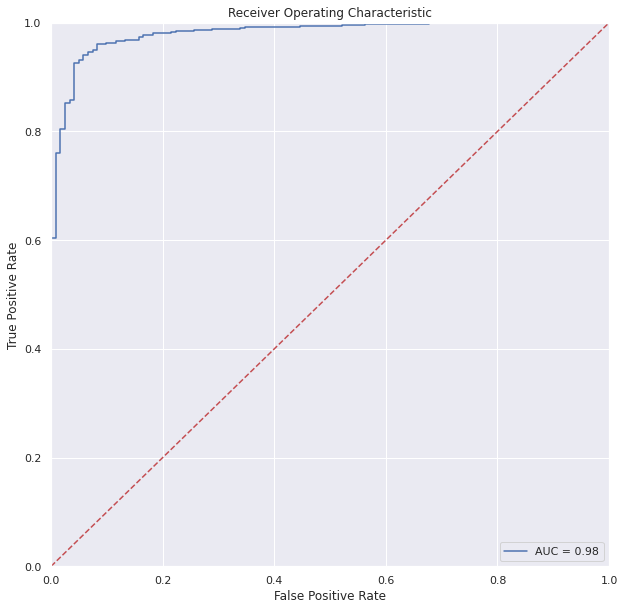

In [0]:
print("ROC Curve for Test")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
from sklearn import metrics
probs = lr.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds, pos_label = 5)
roc_auc = metrics.auc(fpr, tpr)

ROC Curve for Train


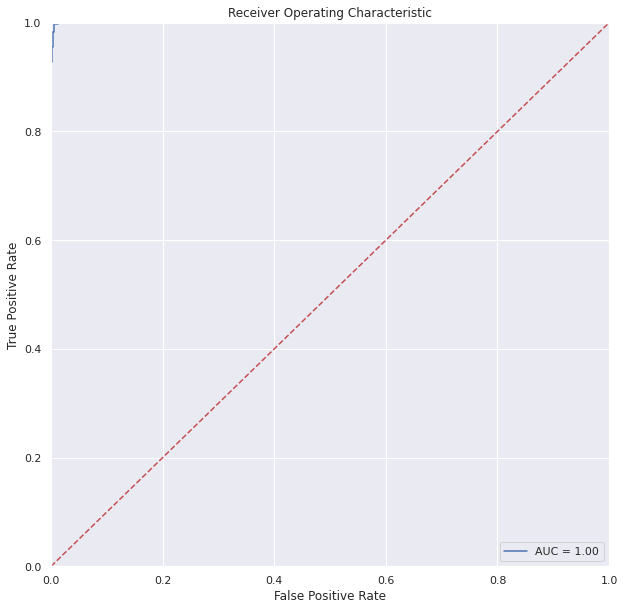

In [0]:
print("ROC Curve for Train")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Multinomial Naive - Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=100)
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
predictions_test = nb.predict(X_test)
predictions_train = nb.predict(X_train)

In [0]:
print("Confusion Matrix for Test :", confusion_matrix(y_test, predictions_test))
print("Confusion Matrix for Train :", confusion_matrix(y_train, predictions_train))
print("\n")
print("Test Accuracy :", accuracy_score(y_test, predictions_test)*100)
print("Train Accuracy :", accuracy_score(y_train, predictions_train)*100)

Confusion Matrix for Test : [[  44   77]
 [  14 2175]]
Confusion Matrix for Train : [[ 335  235]
 [  11 8659]]


Test Accuracy : 96.06060606060606
Train Accuracy : 97.33766233766234


In [0]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           1       0.76      0.36      0.49       121
           5       0.97      0.99      0.98      2189

    accuracy                           0.96      2310
   macro avg       0.86      0.68      0.74      2310
weighted avg       0.95      0.96      0.95      2310



### TFIDF, GridSearchCV

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score, precision_score, recall_score

In [0]:
X_train1, X_test1 = train_test_split(df[['Review Text', 'Recommended IND']], test_size = 0.2)
tf_idf_vect = TfidfVectorizer(ngram_range = (1,2))
tf_idf_vect.fit_transform(X_train1['Review Text'])

<15730x193315 sparse matrix of type '<class 'numpy.float64'>'
	with 1548128 stored elements in Compressed Sparse Row format>

In [0]:
final_tf_idf = tf_idf_vect.transform(df['Review Text'].values)
df['Class IND'] = 1
df.loc[df.Classification == 'Bad', ['Class IND']] = 0
final_tf_idf.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(19663, 193315)

In [0]:
Final_df = hstack((final_tf_idf, scipy.sparse.csr_matrix(df['Recommended IND']).T))
X_tr, X_test, y_tr, y_test = train_test_split(Final_df, df['Class IND'], test_size = 0.2, random_state = 100)

c = [10**x for x in range(-4,4)]
tuned_parameters = [{'alpha': c}]
model = GridSearchCV(BernoulliNB(binarize = 0.0, class_prior = None, fit_prior = True), tuned_parameters, scoring = 'f1_macro', cv = 5)
model.fit(X_tr, y_tr)
cv_scores = model.cv_results_['mean_test_score']

prediction_test = model.predict(X_test)
f1_score(y_test, prediction_test, average = 'macro')

0.8523269208862627

In [0]:
prediction_train = model.predict(X_tr)

print("Train Accuracy :", accuracy_score(y_tr, prediction_train)*100)
print("Test Accuracy :", accuracy_score(y_test, prediction_test)*100)

Train Accuracy : 99.00826446280992
Test Accuracy : 89.49911009407577


### XGBOOST

In [0]:
xgb = XGBClassifier()
parameters = {'learning_rate': [0.05, 0.07, 0.01],
             'max_depth': [5, 6, 7],
             'n_estimators': [10, 50, 100, 500]}
model = RandomizedSearchCV(xgb, parameters, verbose = True, scoring = 'roc_auc', cv = 2, n_jobs = -1)
model.fit(X_tr, y_tr)
cv_scores = model.cv_results_['mean_test_score']

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.8min finished


In [0]:
predict_test = model.predict(X_test)
predict_train = model.predict(X_tr)

print("Test F1 Score :", f1_score(y_test, predict_test, average = 'macro'))
print("Train F1 Score :", f1_score(y_tr, predict_train, average = 'macro'))
print("\n")
print("Train Accuracy :", accuracy_score(y_tr, predict_train)*100)
print("Test Accuracy :", accuracy_score(y_test, predict_test)*100)

Test F1 Score : 0.8990575050261644
Train F1 Score : 0.9071381169210784


Train Accuracy : 93.90972663699937
Test Accuracy : 93.36384439359267


### LinearSVC

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [0]:
nlp = df.copy()
nlp['Positive_Rate'] = np.where(nlp['Rating'] > 3, 1,0)
pd.crosstab(nlp['Recommended IND'],nlp['Positive_Rate'])

Positive_Rate,0,1
Recommended IND,,
0,3408,167
1,1107,14981


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in ['Division Name','Department Name','Class Name']:
    nlp[col] = le.fit_transform(nlp[col])
nlp.columns
X = nlp.drop(columns = ['Positive_Rate'])
Y = nlp['Positive_Rate']
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
vect = CountVectorizer(min_df = 5,ngram_range = (1,3)).fit(X_train['Review Text'])
X_train_vectorized = vect.transform(X_train['Review Text'])
X_test_vectorized = vect.transform(X_test['Review Text'])

In [0]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_vectorized, Y_train) 
predictions_test = clf.predict(X_test_vectorized)
predictions_train = clf.predict(X_train_vectorized)
result_svm_train = cross_val_score(clf, X_train_vectorized, Y_train, cv = kfold, scoring = 'roc_auc')
result_svm_test = cross_val_score(clf, X_test_vectorized, Y_test, cv = kfold, scoring = 'roc_auc')
print("Train Result :", result_svm_train.mean()*100)
print("Test Result :", result_svm_test.mean()*100)
print("Test F1 Score :", f1_score(Y_test, predictions_test, average = 'macro'))
print("Train F1 Score :", f1_score(Y_train, predictions_train, average = "macro"))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Train Result : 91.04952150053009
Test Result : 89.95807324508428
Test F1 Score : 0.8148577459029708
Train F1 Score : 1.0


In [0]:
print("Test Accuracy :", accuracy_score(Y_test, predictions_test)*100)
print("Train Accuracy :", accuracy_score(Y_train, predictions_train)*100)

Test Accuracy : 87.36333587592169
Train Accuracy : 100.0


### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

dtree=DecisionTreeClassifier(max_depth = 8, random_state = 100, max_features = None, min_samples_leaf = 13)
dtree.fit(X_train,y_train)
y_pred_test=dtree.predict(X_test)  
y_pred_tr=dtree.predict(X_train)

print('Test Accuracy :', accuracy_score(y_test,y_pred_test)*100) 
print('Train Accuracy :', accuracy_score(y_train, y_pred_tr)*100)

Test Accuracy : 95.02164502164501
Train Accuracy : 94.81601731601732


### SGD Classifier

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
sgd = SGDClassifier(loss='log', random_state = 101)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
sgd.fit(X_train, y_train)
y_pred_test = sgd.predict(X_test)
y_pred_train = sgd.predict(X_train)
print('Test Accuracy :', accuracy_score(y_test, y_pred_test)*100)
print('Train Accuracy :', accuracy_score(y_train, y_pred_train)*100)

Test Accuracy : 97.05627705627705
Train Accuracy : 99.81601731601731


In [0]:
from sklearn import metrics
probs = sgd.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label = 5)
roc_auc = metrics.auc(fpr, tpr)

ROC Curve for Test


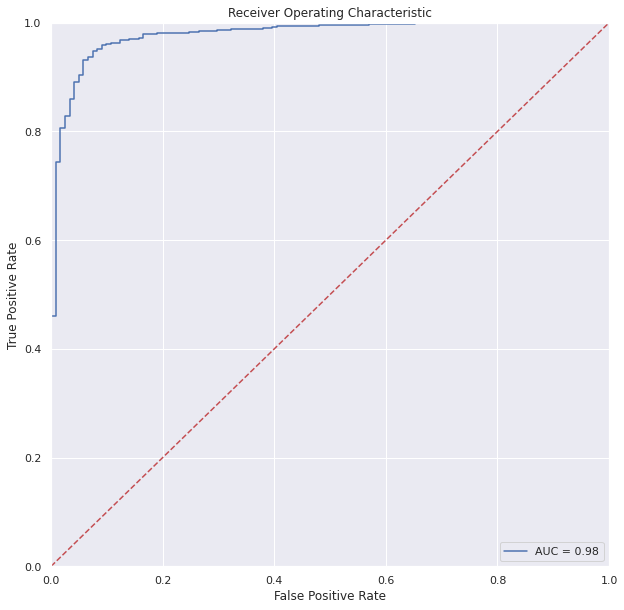

In [0]:
print("ROC Curve for Test")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
from sklearn import metrics
probs = sgd.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds, pos_label = 5)
roc_auc = metrics.auc(fpr, tpr)

ROC Curve for Train


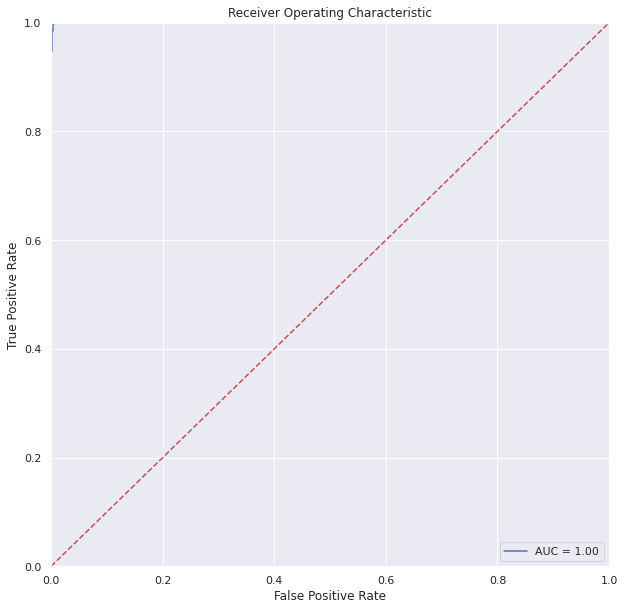

In [0]:
print("ROC Curve for Train")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RNN

In [0]:
import tensorflow as tf
from tensorflow.keras import layers

batch_size = 64
input_dim = 13952
units = 64
output_size = 15 
def build_model(allow_cudnn_kernel=True):
  if allow_cudnn_kernel:
    lstm_layer = tf.keras.layers.LSTM(units, input_shape=(None, input_dim))
  else:
    lstm_layer = tf.keras.layers.RNN(
        tf.keras.layers.LSTMCell(units),
        input_shape=(None, input_dim))
  model = tf.keras.models.Sequential([
      lstm_layer,
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size)]
  )
  return model

model = build_model(allow_cudnn_kernel=True)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='sgd',
              metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs = 10)

Epoch 1/10
145/145 [==============================] - 3s 23ms/step - loss: 1.4769 - accuracy: 0.7156 - val_loss: 0.5417 - val_accuracy: 0.9476
Epoch 2/10
145/145 [==============================] - 3s 21ms/step - loss: 0.2807 - accuracy: 0.9661 - val_loss: 0.2928 - val_accuracy: 0.9476
Epoch 3/10
145/145 [==============================] - 3s 21ms/step - loss: 0.1360 - accuracy: 0.9733 - val_loss: 0.2328 - val_accuracy: 0.9476
Epoch 4/10
145/145 [==============================] - 3s 21ms/step - loss: 0.0953 - accuracy: 0.9786 - val_loss: 0.1520 - val_accuracy: 0.9528
Epoch 5/10
145/145 [==============================] - 3s 21ms/step - loss: 0.0751 - accuracy: 0.9835 - val_loss: 0.1014 - val_accuracy: 0.9667
Epoch 6/10
145/145 [==============================] - 3s 21ms/step - loss: 0.0629 - accuracy: 0.9861 - val_loss: 0.0857 - val_accuracy: 0.9732
Epoch 7/10
145/145 [==============================] - 3s 21ms/step - loss: 0.0524 - accuracy: 0.9893 - val_loss: 0.0865 - val_accuracy: 0.9714

## Inference

1.   Looking at the analysis above, we can say that **LOGISTIC REGRESSION** is the best model from all the models because it has training accuracy of 99.64% and the testing accuracy of 97.27%. It is easy to implement and took less time to process the model. 
2.   Most of the users gave the Good review which is 77% of the total reviews.
3.   Most of the users gave the Rating 5 out of 5.
4.   The core age group that shop here is age 30-45 years. This age group are matured indivudals who cared about rating the product and mostly gave the rating of 5 and also found postive feedback helpful. Age group of above 70 didn't care much about the online rating, which is mostly because they are old. The age group of 15-20 which are teenagers cared less about rating the products and also the feedback didn't back their shopping choices.





